In [1]:
import sys
sys.path.append(".../RADAR_Plataform/RADAR") # dir library

In [5]:
from RADAR.static_data.algorithms import sklearn
from RADAR.static_data.static_datasets_uci import global_load
from sklearn.model_selection import train_test_split
from RADAR.static_data.preprocessing.preprocessing_static import StandardScalerPreprocessing 
from RADAR.visualization_module import DataVisualization
from RADAR.metrics_module import plot_confusion_matrix
import numpy as np


##### load data and preprocess

In [8]:
X,y = global_load('spambase')

Metadata: {'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOu

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [10]:
#Preprocess Data
scaler = StandardScalerPreprocessing()
X_scaled = scaler.fit_transform(X_train)

## EllipticEnvelope Example

##### Define Model and train

In [11]:

kwargs = {"algorithm_": "elliptic","contamination":0.2}
model_elliptic = sklearn.SkLearnAnomalyDetection(**kwargs)
print(model_elliptic.get_params())




{'label_parser': None, 'algorithm_': 'EllipticEnvelope', 'assume_centered': False, 'contamination': 0.2, 'random_state': None, 'store_precision': True, 'support_fraction': None}


In [ ]:
model_elliptic.fit(X_scaled,y_train)

In [ ]:
Xtest_scaled = scaler.fit_transform(X_test)
scores_pred = model_elliptic.decision_function(Xtest_scaled)
print("Scores",scores_pred)


pred = model_elliptic.predict(Xtest_scaled)
print("Prediction:",pred)

EllipticEnvelope returns 1 for normal data and -1 for anomalies, following scikit-learn's standard convention; to convert this to labels 0 (normal) and 1 (anomaly):

In [14]:
labels_pred = (pred == -1).astype(int)  # 1 = anomaly, 0 = normal
labels_true = np.array(y_test).ravel()

In [ ]:
labels_pred== labels_true

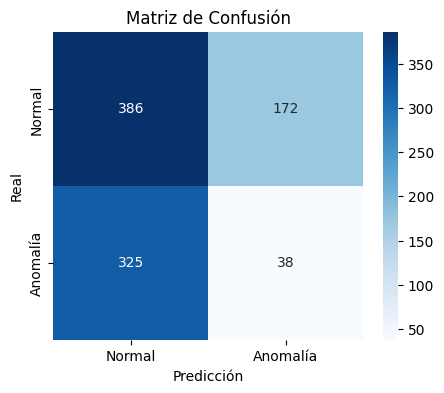

In [16]:
plot_confusion_matrix(labels_true,labels_pred)

##### Data Visualization

In [17]:

visualizer = DataVisualization(data=X_test, plot_technique='plot_anomaly', dim_reduction_technique='PCA', y_true=labels_true, y_pred=labels_pred,subset_size_percent=0.2)
visualizer.fit()
visualizer.show()

## SGDOneClassSVM Example

In [149]:
kwargs = {"algorithm_": "sgdocsvm", "nu" : 0.15, "shuffle":True, "fit_intercept":True, "random_state":42,"tol":1e-6}
modelSVM = sklearn.SkLearnAnomalyDetection(**kwargs)
print(modelSVM.get_params())


{'label_parser': None, 'algorithm_': 'SGDOneClassSVM', 'average': False, 'eta0': 0.0, 'fit_intercept': True, 'learning_rate': 'optimal', 'max_iter': 1000, 'nu': 0.15, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 1e-06, 'verbose': 0, 'warm_start': False}


In [ ]:
modelSVM.fit(X_scaled,y_train)

In [ ]:
Xtest_scaled = scaler.fit_transform(X_test)
scores_pred = modelSVM.decision_function(Xtest_scaled)
print("Scores",scores_pred)


pred = modelSVM.predict(Xtest_scaled)
print("Prediction:",pred)

In [146]:
labels_pred = (pred == -1).astype(int)  # 1 = anomaly, 0 = normal
labels_true = np.array(y_test).ravel()

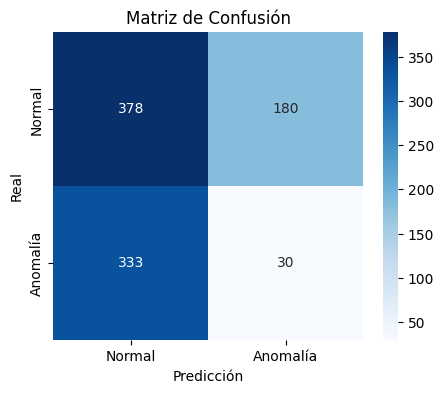

In [147]:
plot_confusion_matrix(labels_true,labels_pred)

In [142]:
visualizer = DataVisualization(data=X_test, plot_technique='plot_anomaly', dim_reduction_technique='PCA', y_true=labels_true, y_pred=labels_pred,subset_size_percent=0.2)
visualizer.fit()
visualizer.show()